In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('./feature_extraction.csv')

In [3]:
# Only Xs
# If X is included, y must be drop out
dataset.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr47,Attr49,Attr51,Attr53,Attr55,Attr57,Attr58,Attr59,Attr61,Attr64
0,-0.024558,0.30051,0.10733,1.836800,34.382,-0.026711,-0.020067,2.251900,1.06670,0.67673,...,28.560,-0.042542,0.12826,0.885300,3937.6000,-0.036289,0.93750,0.25454,3.6930,0.882600
1,0.639180,0.00000,1.00000,8.664398,29.678,-1.139300,0.760520,13.140329,1.11850,1.00000,...,0.000,0.679830,0.00000,5.968141,16.6650,0.639180,0.32014,0.00000,37.8860,36.363852
2,-0.440760,0.47723,0.19260,1.467800,34.555,0.000000,-0.440760,1.095400,1.51860,0.52277,...,0.000,-0.332570,0.41169,1.321100,180.9100,-0.843130,1.28710,0.12538,2.5649,3.837600
3,0.119520,0.17679,0.63546,4.594400,117.650,0.251540,0.148750,4.582600,1.12630,0.81017,...,46.033,0.052172,0.17679,4.315100,180570.0000,0.147520,0.88789,0.00000,10.2870,8.516900
4,0.230400,0.27095,0.23762,2.574500,-26.928,0.617540,0.282690,2.690700,0.80411,0.72905,...,70.950,0.315000,0.15091,1.192300,2.5745,0.316020,0.62320,0.16465,6.6605,1.315000


In [4]:
pca = PCA(n_components=dataset.shape[1])
pca.fit(dataset)

PCA(n_components=42)

In [5]:
explained_variance_ratio = pca.explained_variance_ratio_

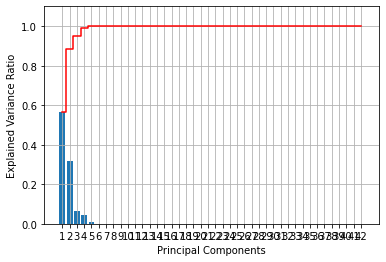

In [6]:
x_axis = range(1, len(explained_variance_ratio)+1)
plt.bar(x_axis, explained_variance_ratio,
        align = 'center', label = 'Individual Explained Variance Ratio')
plt.step(x_axis, np.cumsum(explained_variance_ratio),
         where = 'mid', color='red', label='Cumulative Explained Variance Ratio')
plt.ylim(0, 1.1)
plt.xticks(x_axis)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

In [7]:
pd.DataFrame(np.cumsum(explained_variance_ratio[:10]), 
                    index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'], 
                    columns=['Cum_V_ration'])

,Cum_V_ration
PC1,0.565585
PC2,0.885692
PC3,0.948189
PC4,0.991418
PC5,0.999213
PC6,0.999768
PC7,0.999890
PC8,0.999961
PC9,0.999972
PC10,0.999983


In [8]:
pcs = pca.fit_transform(dataset)

In [12]:
n_of_pcs = 4 # must be less than 10
print("PC의 설명력 : {:.3f}%".format(np.sum(explained_variance_ratio[:n_of_pcs]*100)))
pca_data = pd.DataFrame(pcs[:,:n_of_pcs], 
                        columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'][:n_of_pcs])

PC의 설명력 : 99.142%


In [13]:
pca_data.head()

,PC1,PC2,PC3,PC4
0,2462.543146,-4424.081261,-772.992099,-1323.736391
1,-3887.750372,-8335.037027,-874.670380,-11.229910
2,-4363.058646,-8168.469514,-737.621117,-1366.650349
3,-3256.618992,172218.697025,-939.793493,-1149.852059
4,-3571.781094,-8348.493381,-780.925514,-1156.520260
